In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from kneed import KneeLocator
from scipy import stats
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

## Performance Metrics Clustering-Silhouetter Coefficient with the implementation of K-Means Clustering Algorithm from scratch

<div style="font-size: 17px">Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.
    
<div style="font-size:17px">Silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.</div>

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the <a href="https://en.wikipedia.org/wiki/Euclidean_distance">Euclidean distance</a> or the <a href="https://en.wikipedia.org/wiki/Taxicab_geometry">Manhattan distance.</a></div>

## Definition

Assume the data have been clustered via any technique, such as <a href="https://realpython.com/k-means-clustering-python/">k-means</a>, into κ clusters.

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

In [4]:
features, labels = make_blobs(n_samples=500,
                                n_features=3,
                                centers=4,
                                cluster_std=1.0,
                                center_box=(-10.0, 10.0),
                                shuffle=True,
                                random_state=1
                             )

In [5]:
features

array([[ -1.12920444,   3.71482912, -10.39446603],
       [  2.06732805,  -1.5362701 ,   5.01728542],
       [ -5.90545383,  -8.46721133,  -7.70210517],
       ...,
       [ -4.95351774,  -6.01988777,  -7.54471341],
       [ -4.4309294 ,  -7.03888219,  -9.50192455],
       [ -2.4450939 ,   2.65056423,  -9.28292291]])

In [10]:
features = pd.DataFrame(features, columns="A B C".split())

In [11]:
features

,A,B,C
0,-1.129204,3.714829,-10.394466
1,2.067328,-1.536270,5.017285
2,-5.905454,-8.467211,-7.702105
3,-2.097069,4.501915,-9.076262
4,-0.909148,4.935955,-9.860011
...,...,...,...
495,-5.956781,-3.979057,-1.953313
496,-1.890400,1.613405,-8.060184
497,-4.953518,-6.019888,-7.544713
498,-4.430929,-7.038882,-9.501925


### Implemetation Of Elbow method 

In [42]:
#Instantiateting the Kmeans algorithm
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    cluster_label = kmeans.predict(features)
    sse.append(kmeans.inertia_)
print(sse)

[27933.17133426341, 15507.370796762754, 5051.817316070473, 1468.2008674372166, 1369.0659070730344, 1286.653818644007, 1208.3964833211307, 1134.5021847090886, 1054.3144869183775, 1012.7862841488586]


In [43]:
cluster_label

array([5, 8, 2, 7, 1, 1, 7, 5, 3, 2, 2, 8, 0, 0, 3, 8, 2, 1, 7, 2, 3, 5,
       5, 6, 3, 3, 0, 6, 7, 8, 2, 8, 4, 5, 9, 4, 5, 5, 9, 4, 4, 5, 3, 6,
       1, 4, 5, 3, 7, 7, 6, 3, 3, 8, 5, 2, 3, 9, 2, 8, 0, 3, 7, 8, 6, 7,
       1, 9, 1, 4, 8, 0, 8, 2, 9, 8, 8, 7, 2, 3, 6, 9, 2, 0, 0, 0, 3, 8,
       9, 4, 3, 5, 0, 4, 8, 8, 4, 5, 7, 4, 7, 2, 6, 4, 4, 8, 2, 5, 8, 4,
       6, 3, 2, 2, 1, 2, 7, 2, 6, 4, 8, 6, 8, 0, 1, 6, 2, 2, 6, 2, 2, 3,
       9, 6, 3, 4, 2, 6, 3, 1, 0, 1, 0, 6, 2, 4, 5, 0, 6, 3, 2, 5, 8, 0,
       9, 9, 8, 4, 6, 8, 3, 0, 3, 4, 8, 9, 3, 0, 5, 7, 3, 8, 4, 1, 3, 8,
       5, 3, 5, 7, 1, 2, 2, 5, 3, 0, 1, 6, 5, 8, 4, 0, 8, 1, 5, 3, 8, 3,
       5, 0, 0, 4, 8, 0, 7, 1, 9, 7, 9, 3, 1, 9, 3, 0, 4, 5, 0, 0, 3, 3,
       9, 9, 5, 4, 2, 6, 3, 5, 3, 2, 3, 9, 8, 2, 6, 5, 6, 9, 0, 2, 0, 8,
       2, 7, 5, 4, 9, 7, 2, 2, 8, 1, 4, 0, 0, 4, 1, 2, 4, 2, 5, 0, 1, 0,
       1, 8, 9, 7, 0, 8, 6, 7, 0, 2, 0, 4, 3, 3, 1, 8, 2, 9, 2, 4, 0, 7,
       2, 5, 7, 3, 3, 4, 4, 9, 2, 4, 7, 3, 0, 5, 3,

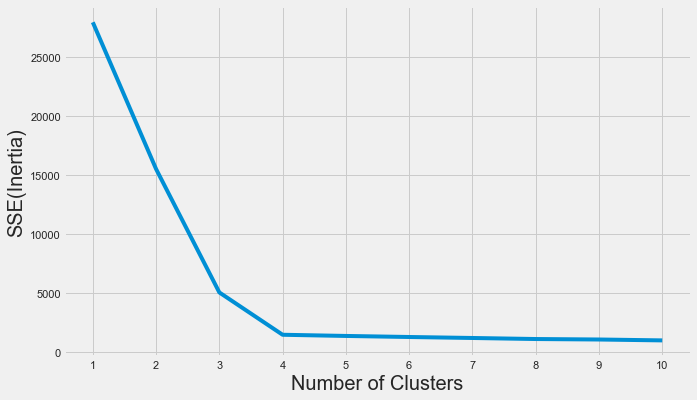

In [29]:
from matplotlib import rcParams
sns.set_theme()

rcParams['figure.figsize'] = 10, 6
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.ylabel('SSE(Inertia)', size=20)
plt.xlabel('Number of Clusters', size=20)
plt.show()

In [30]:
k_elbow = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")

In [31]:
k_elbow.elbow

4

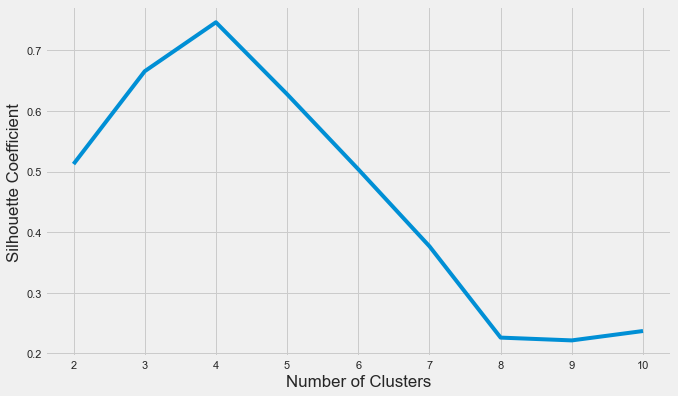

In [32]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5123815346283751
For n_clusters = 3 The average silhouette_score is : 0.6655256914910949
For n_clusters = 4 The average silhouette_score is : 0.746313482667711
For n_clusters = 5 The average silhouette_score is : 0.6255901479400516
For n_clusters = 6 The average silhouette_score is : 0.49188611851745845
For n_clusters = 7 The average silhouette_score is : 0.3441933150144116
For n_clusters = 8 The average silhouette_score is : 0.22594131345502155


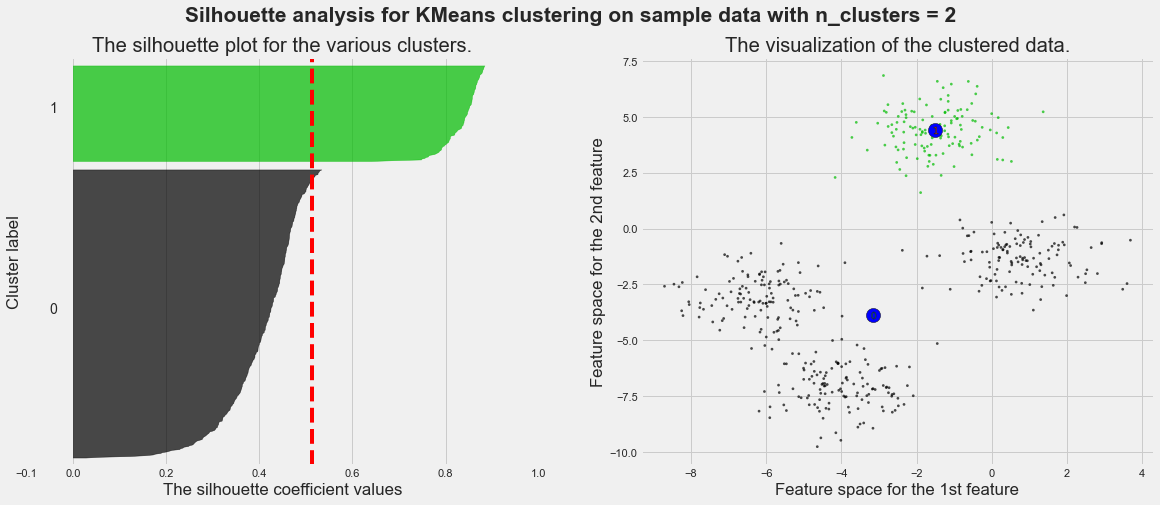

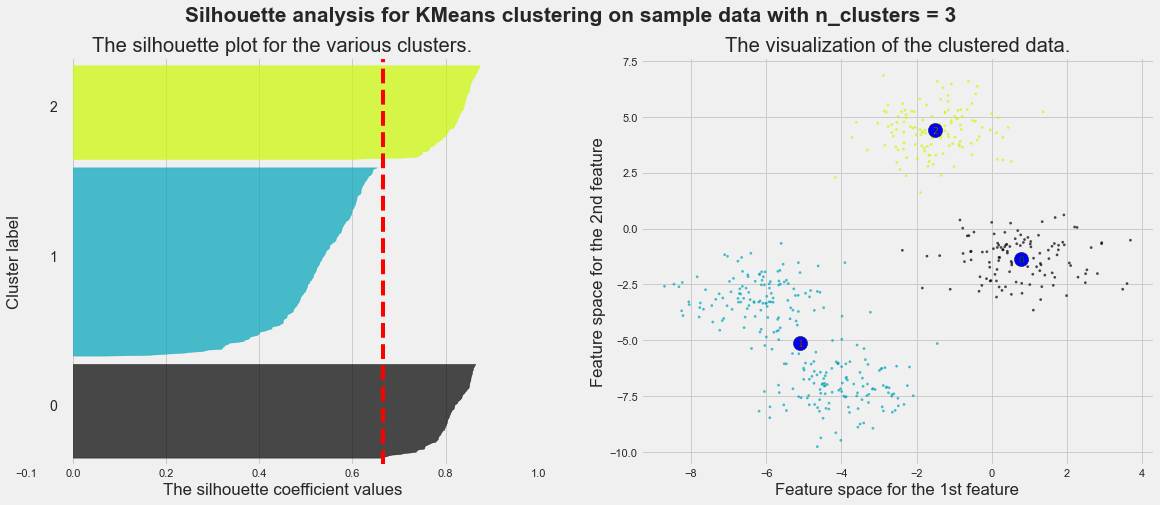

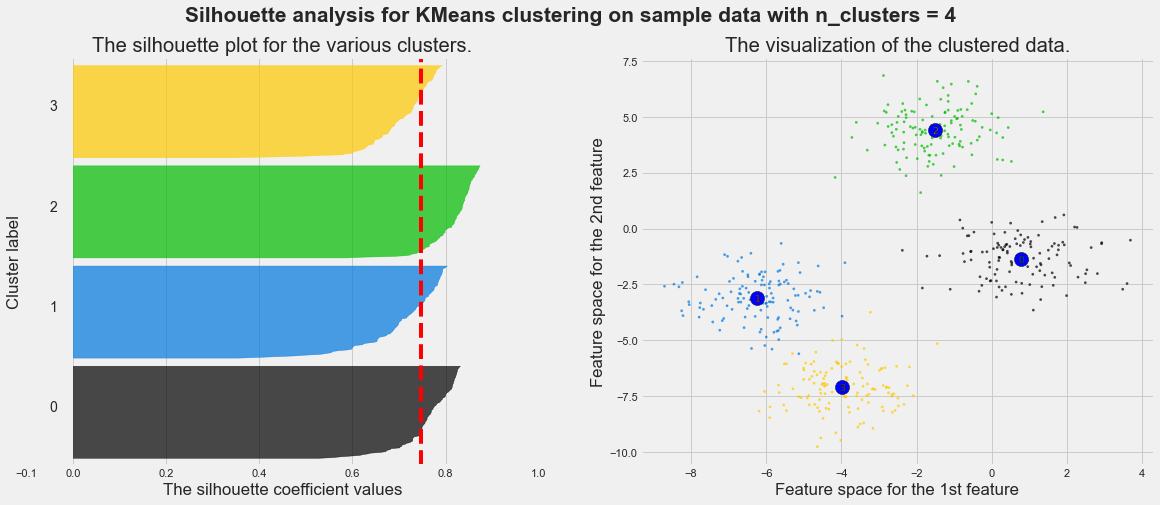

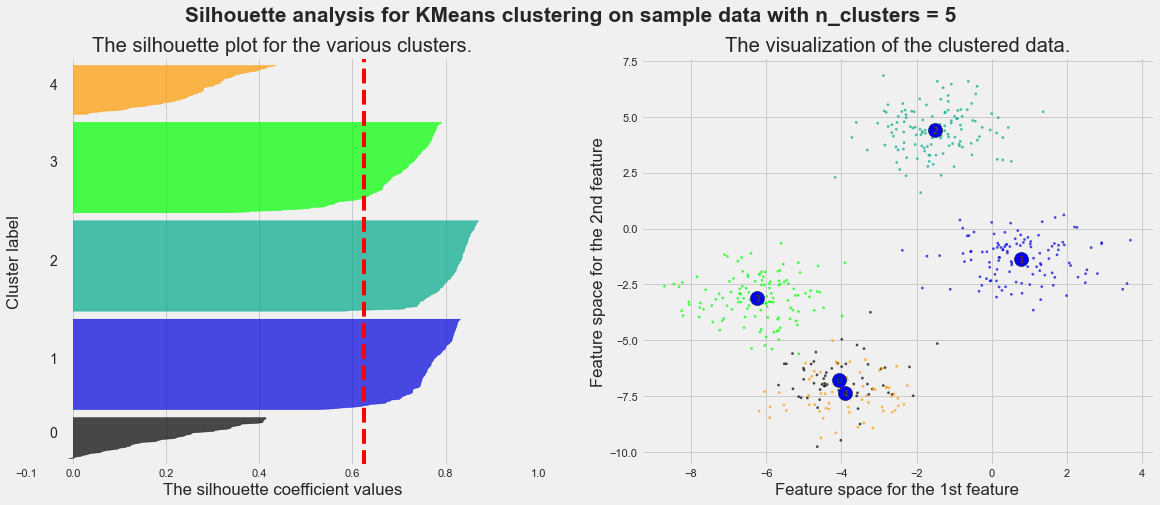

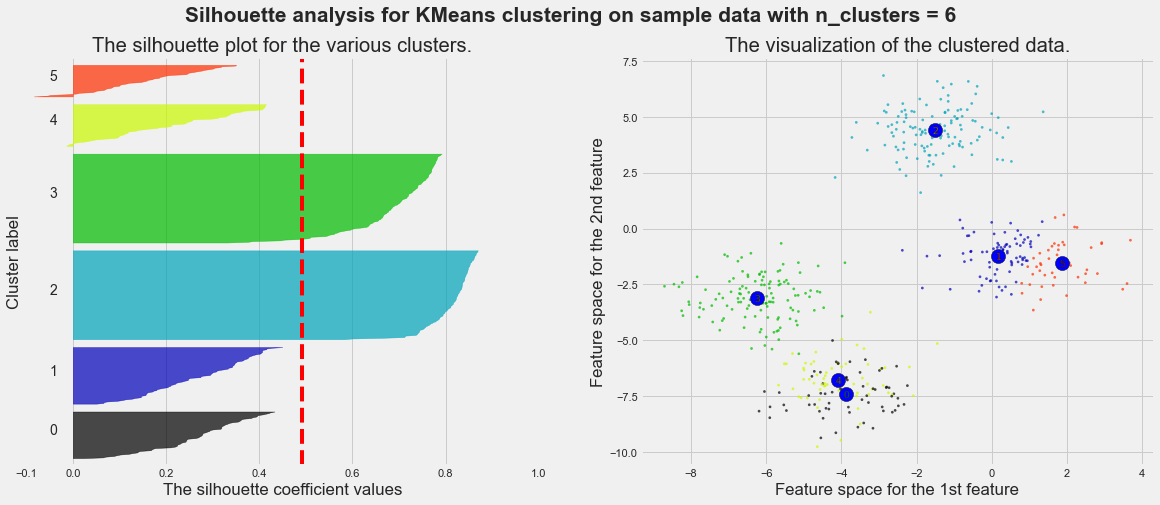

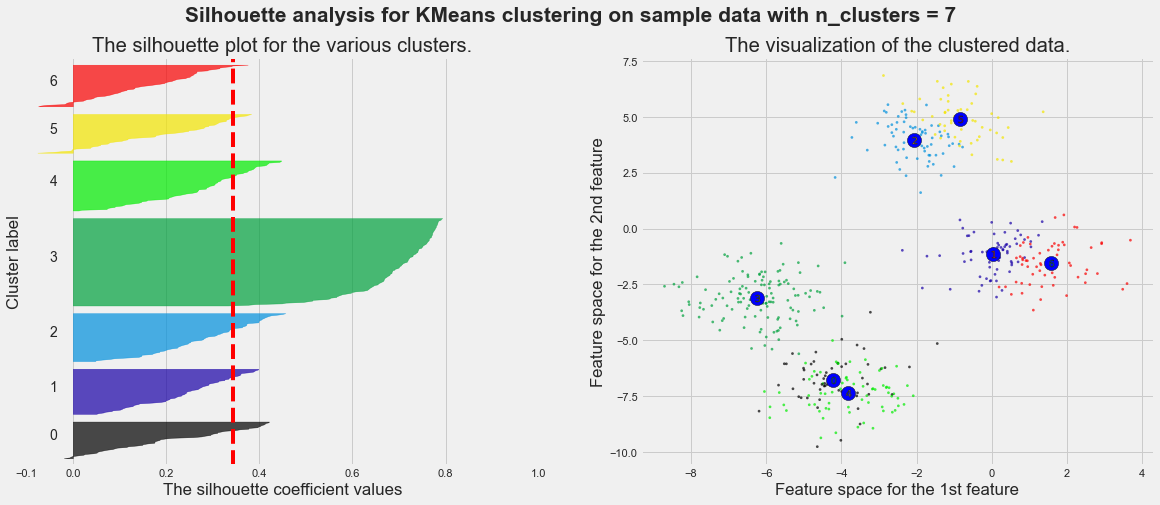

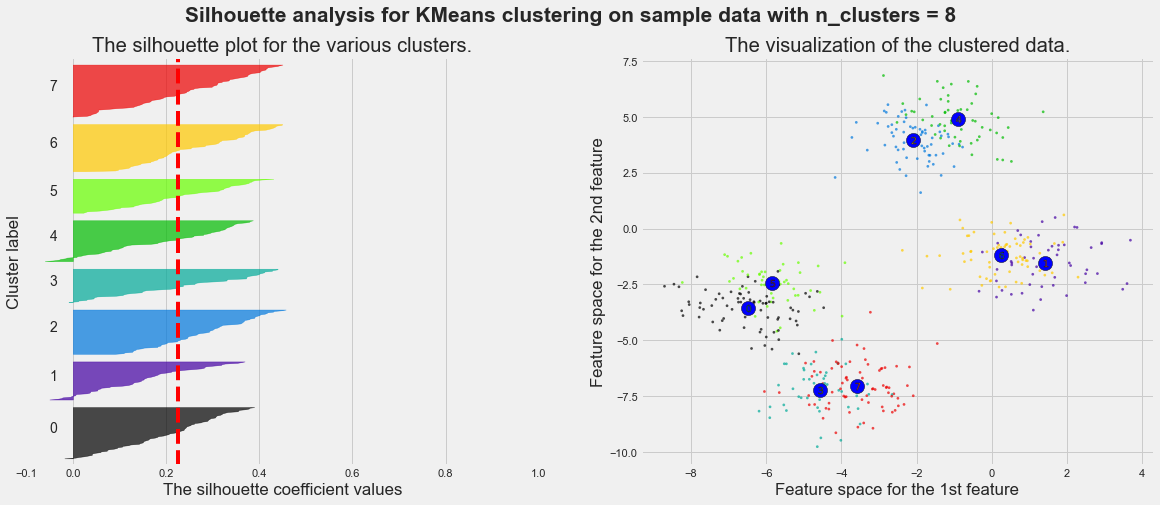

In [57]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax[0].set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax[0].set_ylim([0, len(features) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax[0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax[0].set_title("The silhouette plot for the various clusters.")
    ax[0].set_xlabel("The silhouette coefficient values")
    ax[0].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[0].set_yticks([])  # Clear the yaxis labels / ticks
    ax[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax[1].scatter(
        features.values[:, 0], features.values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax[1].scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="blue",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax[1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax[1].set_title("The visualization of the clustered data.")
    ax[1].set_xlabel("Feature space for the 1st feature")
    ax[1].set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=21,
        fontweight="bold",
    )

plt.show()

In [27]:
len(features)

500